In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [11]:
chang_2016 = pd.read_csv("chang_2016.list",header=None)[0].tolist()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


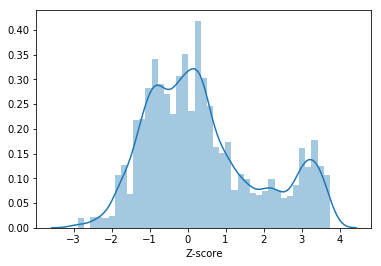

In [12]:
def define_group(x):
    flag = False
    for i in chang_2016:
        if i in x:
            flag = True
    for i in ['CD49','CD71']:
        if i in x:
            flag = True
    if not flag:
        return "others"
    if "acute" in x:
        return "others"
    out = "_".join(x.split("_")[-2:]).replace(".rmdup.bed","").replace("cell_","")
    if out == "Bone_Marrow":
        out = "BM_CD34"
    if out == "Cord_Blood":
        out = "CB_CD34"
    if out == "Ery":
        out = "others"        
    if out == "CD71minus_CD235minus":
        out = 'MyP'
    if "CD49" in out or "CD71" in out:
        out = 'CB_Ery'
    return out
df = pd.read_csv("blood_ATAC_bw_mean.tsv",sep="\t",index_col=0)
df = df+1e-300
df = ( df/df.sum())*1000000 ## RPM
col_names = [define_group(x) for x in df.columns] 
df = df.T
df['group']= col_names    
df = df[df['group']!='others']
mean_exp = df.groupby('group').mean()
group_df = mean_exp/mean_exp.sum()
def z_score(x):
    ery = x['CB_Ery']
    return (ery - x.mean())/x.std()
group_df = group_df.T
group_df['Z-score'] = group_df.apply(z_score,axis=1)
sns.distplot(group_df['Z-score'])

In [13]:
def rename(x):
    chr,temp = x.split(":")
    start,end = temp.split("-")
    start = int(start)+10
    end = int(end)-10
    return "%s:%s-%s"%(chr,start,end)
group_df.index = [rename(x) for x in group_df.index.tolist()]

In [14]:
group_df.sort_values('Z-score',ascending=False).to_csv("Ery_z_score.csv")